### Importing Libraries

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import nltk
from nltk.stem import PorterStemmer

import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

### Loading Data

Load the data, and have a glimpse of the data

In [2]:
data = pd.read_csv('Suicide_Detection.csv')

print(data.head(),"\n")
print(data.info(),"\n")
print("Shape: ",data.shape)

   Unnamed: 0                                               text        class
0           2  Ex Wife Threatening SuicideRecently I left my ...      suicide
1           3  Am I weird I don't get affected by compliments...  non-suicide
2           4  Finally 2020 is almost over... So I can never ...  non-suicide
3           8          i need helpjust help me im crying so hard      suicide
4           9  I’m so lostHello, my name is Adam (16) and I’v...      suicide 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB
None 

Shape:  (232074, 3)


The column 'Unnammed: 0' is a meaningless column at here, thus we can delete it

In [3]:
data.drop(columns = 'Unnamed: 0', inplace=True)
data.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


Check is null value available

In [4]:
data.isnull().sum()

text     0
class    0
dtype: int64

### Data Visualization

suicide        116037
non-suicide    116037
Name: class, dtype: int64


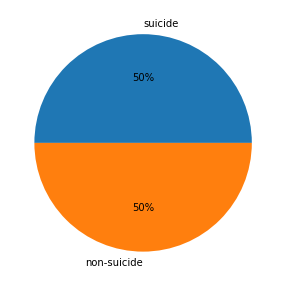

In [18]:
classCount = data["class"].value_counts()
print(classCount)

plt.figure(figsize=((20,5)))

plt.subplot(1,2,2)
plt.pie(classCount,labels = classCount.index,autopct='%.0f%%')

plt.show()


### Text Processing

In [25]:
# Convert texts to lower case
data['text'] = data['text'].str.lower()

# Remove punctuations
data['text'] = data['text'].str.replace(r'[^\w\s]+','',regex=True)

# Remove stop words
from nltk.corpus import stopwords
# nltk.download('stopwords')

stop_words = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Tokenize the words
data['text'] = data['text'].apply(lambda x:nltk.word_tokenize(x))



In [32]:
# Stemming the words
ps = PorterStemmer()
data['text'] = data['text'].apply(lambda x: [ps.stem(i) for i in x])
data['text'] = data['text'].apply(lambda x: ' '.join(x))

In [33]:
data.head()

,text,class
0,ex wife threaten suiciderec left wife good che...,suicide
1,weird dont get affect compliment come someon k...,non-suicide
2,final 2020 almost never hear 2020 bad year eve...,non-suicide
3,need helpjust help im cri hard,suicide
4,im losthello name adam 16 ive struggl year im ...,suicide


### Naive Bayes Classifier

In [ ]:
import random
import pickle
import os

